In [132]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler




In [111]:
df=pd.read_csv('/content/Iris.csv')

In [112]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [113]:
df=df.drop('Id',axis=1)


In [114]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [115]:
df=df.drop_duplicates()

In [116]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [117]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [118]:

df = pd.get_dummies(df, columns=['Species'])
df = df_encoded.astype(int)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5,3,1,0,1,0,0
1,4,3,1,0,1,0,0
2,4,3,1,0,1,0,0
3,4,3,1,0,1,0,0
4,5,3,1,0,1,0,0
...,...,...,...,...,...,...,...
145,6,3,5,2,0,0,1
146,6,2,5,1,0,0,1
147,6,3,5,2,0,0,1
148,6,3,5,2,0,0,1


In [119]:
print(df['Species_Iris-setosa'].corr(df['SepalLengthCm']))
print(df['Species_Iris-setosa'].corr(df['SepalWidthCm']))
print(df['Species_Iris-setosa'].corr(df['PetalLengthCm']))
print(df['Species_Iris-setosa'].corr(df['PetalWidthCm']))


-0.6562346331166871
0.5175260902195272
-0.9214810550401907
-0.8514268525962286


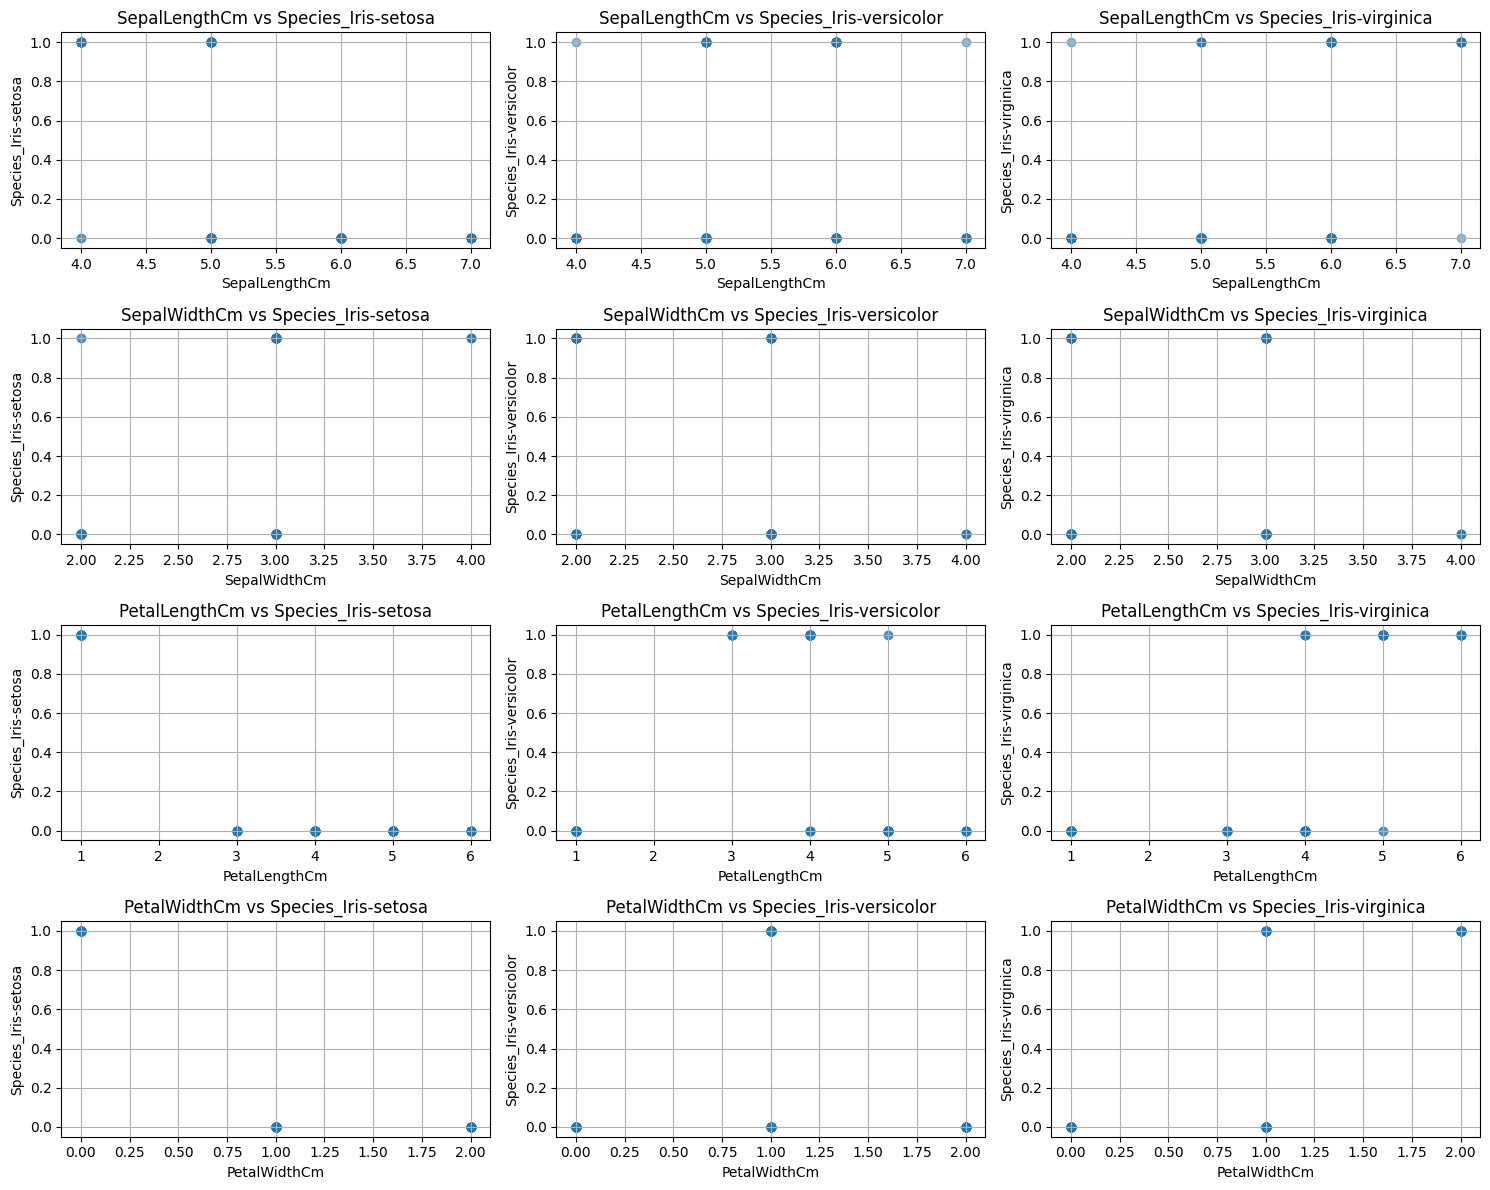

In [120]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
targets = ['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features):
    for j, target in enumerate(targets):
        plt.subplot(len(features), len(targets), i * len(targets) + j + 1)
        plt.scatter(df[feature], df[target], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f'{feature} vs {target}')
        plt.grid(True)

plt.tight_layout()
plt.show()

In [125]:
# Assuming 'data' is your DataFrame
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_setosa = df['Species_Iris-setosa']
y_versicolor = df['Species_Iris-versicolor']
y_virginica = df['Species_Iris-virginica']


In [126]:
X_train, X_test, y_train_setosa, y_test_setosa = train_test_split(X, y_setosa, test_size=0.2, random_state=42)
_, _, y_train_versicolor, y_test_versicolor = train_test_split(X, y_versicolor, test_size=0.2, random_state=42)
_, _, y_train_virginica, y_test_virginica = train_test_split(X, y_virginica, test_size=0.2, random_state=42)


In [127]:
model_setosa = LogisticRegression()
model_versicolor = LogisticRegression()
model_virginica = LogisticRegression()

model_setosa.fit(X_train, y_train_setosa)
model_versicolor.fit(X_train, y_train_versicolor)
model_virginica.fit(X_train, y_train_virginica)


LogisticRegression()

In [129]:
y_pred_setosa = model_setosa.predict(X_test)
y_pred_versicolor = model_versicolor.predict(X_test)
y_pred_virginica = model_virginica.predict(X_test)


In [133]:
print("Setosa Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_setosa, y_pred_setosa))
print("Classification Report:\n", classification_report(y_test_setosa, y_pred_setosa))

print("\nVersicolor Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_versicolor, y_pred_versicolor))
print("Classification Report:\n", classification_report(y_test_versicolor, y_pred_versicolor))

print("\nVirginica Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_virginica, y_pred_virginica))
print("Classification Report:\n", classification_report(y_test_virginica, y_pred_virginica))


Setosa Model Evaluation:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Versicolor Model Evaluation:
Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.67      0.80      0.73        10

    accuracy                           0.80        30
   macro avg       0.78      0.80      0.78        30
weighted avg       0.81      0.80      0.80        30


Virginica Model Evaluation:
Accuracy: 0.8666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.86 